# Import dependencies

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Load datasets and extract images

In [5]:
dataset = np.load('../Datasets/pneumoniamnist.npz')
print("dataset keys: ", pd.DataFrame(dataset).head())

# extract images
train_images = dataset['train_images']
val_images = dataset['val_images']
test_images = dataset['test_images']

# extract labels
train_labels = dataset['train_labels']
val_labels = dataset['val_labels']
test_labels = dataset['test_labels']

dataset keys:                0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


# Get image dimensions

In [6]:
train_images_shape = np.shape(train_images)
train_labels_shape = np.shape(train_labels)
val_images_shape = np.shape(val_images)
val_labels_shape = np.shape(val_labels)
test_images_shape = np.shape(test_images)
test_labels_shape = np.shape(test_labels)

print("train_images_shape: ", train_images_shape)
print("train_labels_shape: ", train_labels_shape)
print("val_images_shape: ", val_images_shape)
print("val_labels_shape: ", val_labels_shape)
print("test_images_shape: ", test_images_shape)
print("test_labels_shape: ", test_labels_shape)

train_images_shape:  (4708, 28, 28)
train_labels_shape:  (4708, 1)
val_images_shape:  (524, 28, 28)
val_labels_shape:  (524, 1)
test_images_shape:  (624, 28, 28)
test_labels_shape:  (624, 1)


# Visualising images
1 is normal, 0 i pneumonia

Test Image label 0 case:  [1]


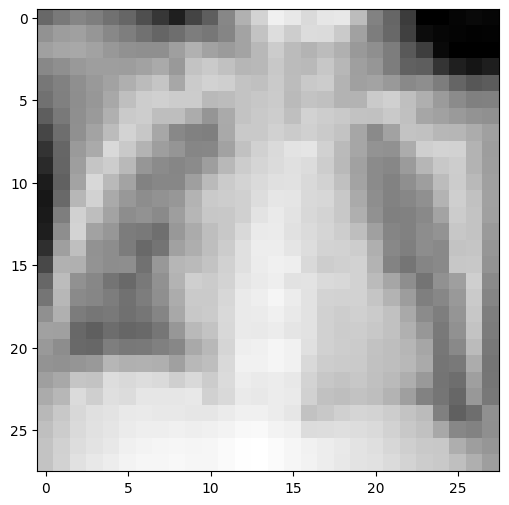

Test Image label 1 case:  [1]


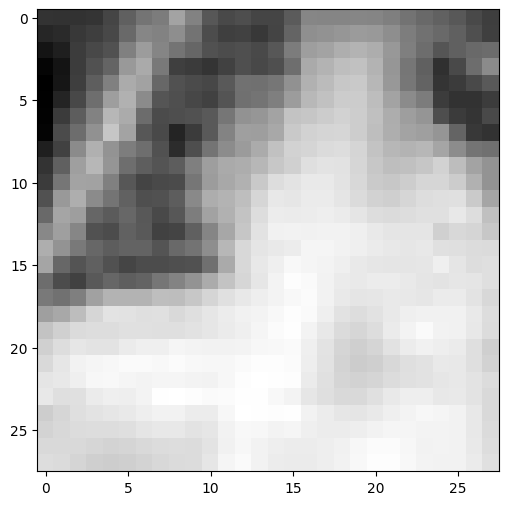

In [7]:
# 0 case
test_image = train_images[0]
test_image_label = train_labels[0]
# print('Test Image as array: ', test_image)
print('Test Image label 0 case: ', test_image_label)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray') 
plt.show()

# 1 case
test_image_1 = train_images[-1]
test_image_label_1 = train_labels[-1]
print('Test Image label 1 case: ', test_image_label_1)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image_1, cmap='gray') 
plt.show()

# Normalize images to floating point, convert labels, and expand images to fit grey scale channel


In [8]:
# normalize images
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert labels
train_labels = tf.keras.utils.to_categorical(train_labels)
val_labels = tf.keras.utils.to_categorical(val_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# expand image shape
train_images = np.expand_dims(train_images, axis=-1)  # Add an extra dimension for the channel
val_images = np.expand_dims(val_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# see new shapes
train_images_shape = np.shape(train_images)
train_labels_shape = np.shape(train_labels)
val_images_shape = np.shape(val_images)
val_labels_shape = np.shape(val_labels)
test_images_shape = np.shape(test_images)
test_labels_shape = np.shape(test_labels)

print("train_images_shape: ", train_images_shape)
print("train_labels_shape: ", train_labels_shape)
print("val_images_shape: ", val_images_shape)
print("val_labels_shape: ", val_labels_shape)
print("test_images_shape: ", test_images_shape)
print("test_labels_shape: ", test_labels_shape)

train_images_shape:  (4708, 28, 28, 1)
train_labels_shape:  (4708, 2)
val_images_shape:  (524, 28, 28, 1)
val_labels_shape:  (524, 2)
test_images_shape:  (624, 28, 28, 1)
test_labels_shape:  (624, 2)


# Create CNN model


In [9]:
model = tf.keras.models.Sequential([
    # Convolutional layer: Extracts features from the input images
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Another Convolutional layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Fully connected layer: Computes the final output scores
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer: Has a number of neurons equal to the number of classes, with a softmax activation function
    tf.keras.layers.Dense(len(train_labels[0]), activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

# Compile Model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model

In [11]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))


Epoch 1/30
148/148 [==============================] - 2s 10ms/step - loss: 0.3232 - accuracy: 0.8575 - val_loss: 0.1931 - val_accuracy: 0.9198
Epoch 2/30
148/148 [==============================] - 1s 9ms/step - loss: 0.1754 - accuracy: 0.9284 - val_loss: 0.1771 - val_accuracy: 0.9218
Epoch 3/30
148/148 [==============================] - 1s 9ms/step - loss: 0.1564 - accuracy: 0.9361 - val_loss: 0.1511 - val_accuracy: 0.9466
Epoch 4/30
148/148 [==============================] - 1s 9ms/step - loss: 0.1269 - accuracy: 0.9526 - val_loss: 0.1197 - val_accuracy: 0.9618
Epoch 5/30
148/148 [==============================] - 1s 10ms/step - loss: 0.1224 - accuracy: 0.9550 - val_loss: 0.0962 - val_accuracy: 0.9637
Epoch 6/30
148/148 [==============================] - 1s 10ms/step - loss: 0.1011 - accuracy: 0.9611 - val_loss: 0.1213 - val_accuracy: 0.9599
Epoch 7/30
148/148 [==============================] - 1s 10ms/step - loss: 0.0962 - accuracy: 0.9626 - val_loss: 0.0864 - val_accuracy: 0.9542
Ep

# Plot training performance

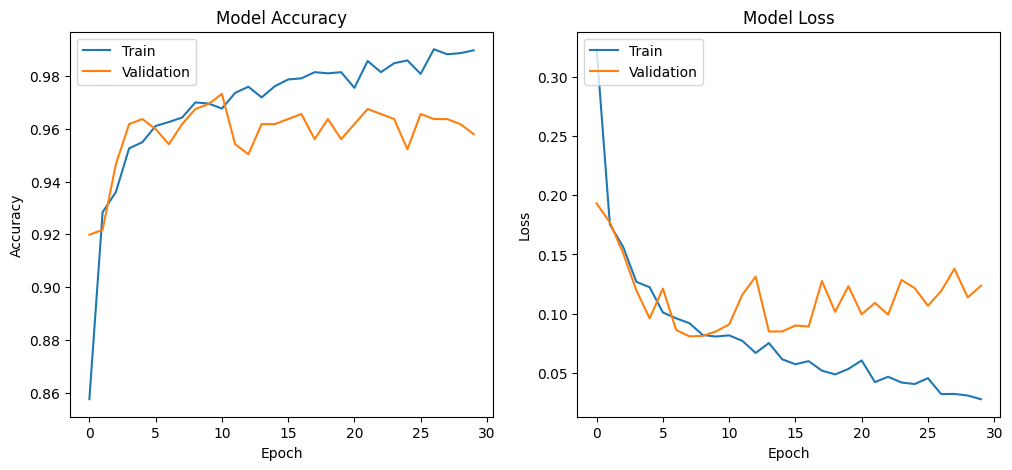

In [12]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# analyse test accuracy w/ Confusion matrix

20/20 [==============================] - 0s 3ms/step - loss: 0.7948 - accuracy: 0.8734
Test accuracy: 0.8733974099159241
20/20 [==============================] - 0s 3ms/step


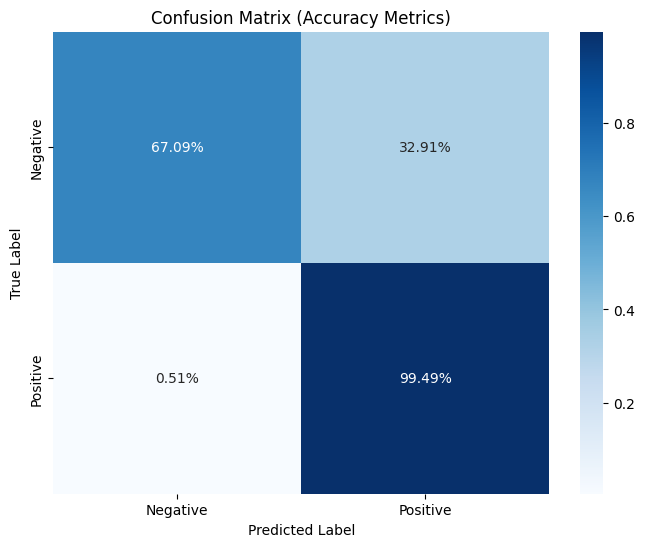

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Predict classes
predicted_classes = np.argmax(model.predict(test_images), axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate accuracy metrics
TP_rate = TP / (TP + FN)
TN_rate = TN / (TN + FP)
FP_rate = FP / (TN + FP)
FN_rate = FN / (TP + FN)

cm_normalized = np.array([[TN_rate, FP_rate], [FN_rate, TP_rate]])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy Metrics)')
plt.show()

# Analyse Error Images

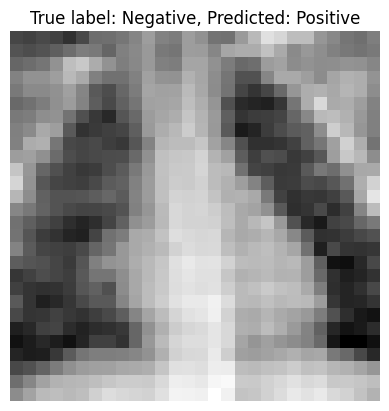

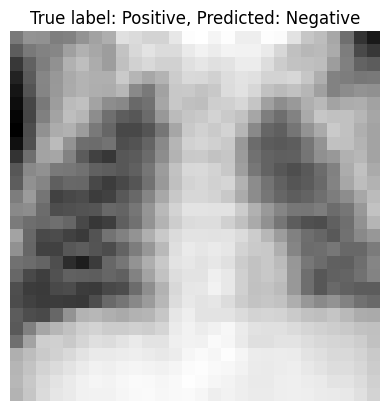

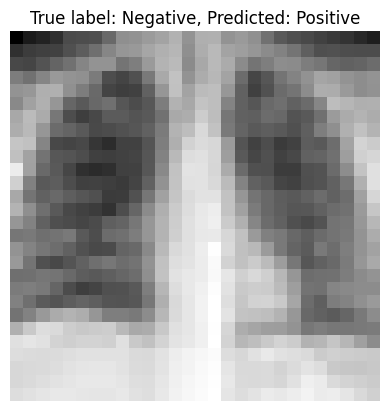

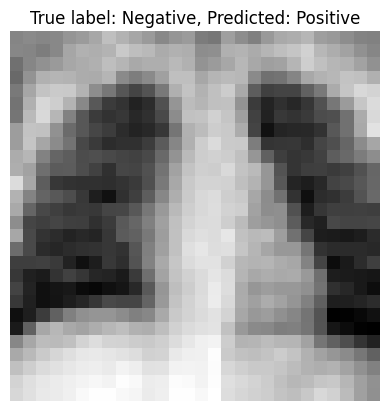

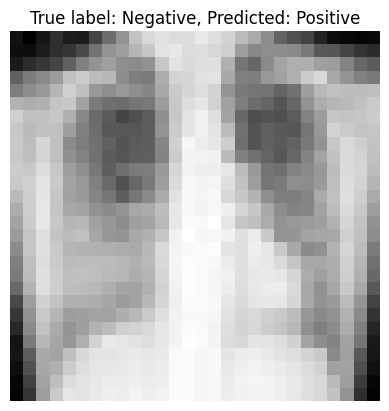

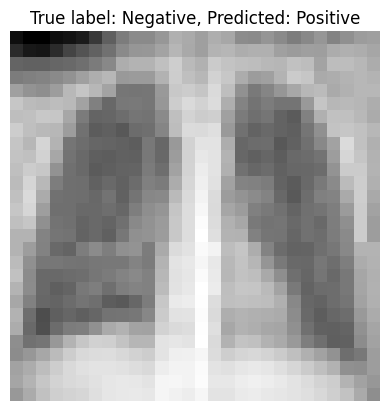

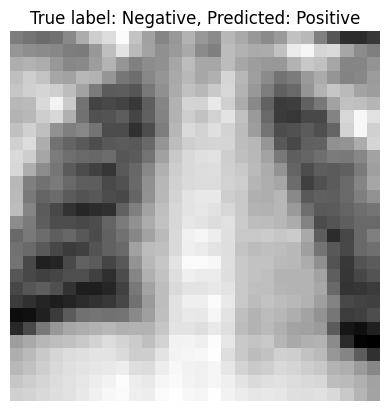

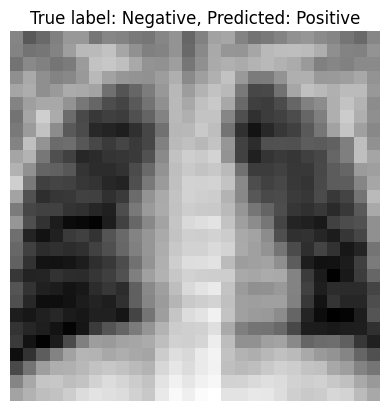

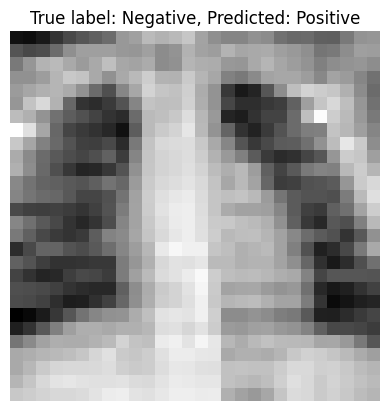

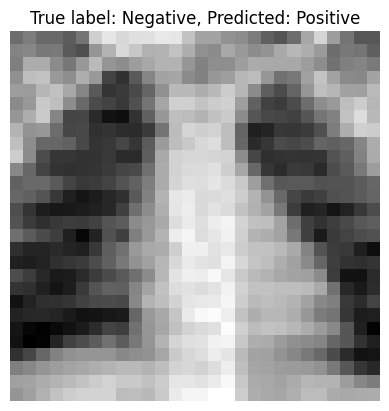

In [14]:
def label_to_string(label):
    return "Positive" if label == 1 else "Negative"

misclassified_indices = np.where(predicted_classes != true_classes)[0]
sample_misclassified_indices = np.random.choice(misclassified_indices, 10, replace=False)

for i in sample_misclassified_indices:
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    true_label_str = label_to_string(true_classes[i])
    predicted_label_str = label_to_string(predicted_classes[i])
    plt.title(f"True label: {true_label_str}, Predicted: {predicted_label_str}")
    plt.axis('off')
    plt.show()

# Analyse Distribution of data

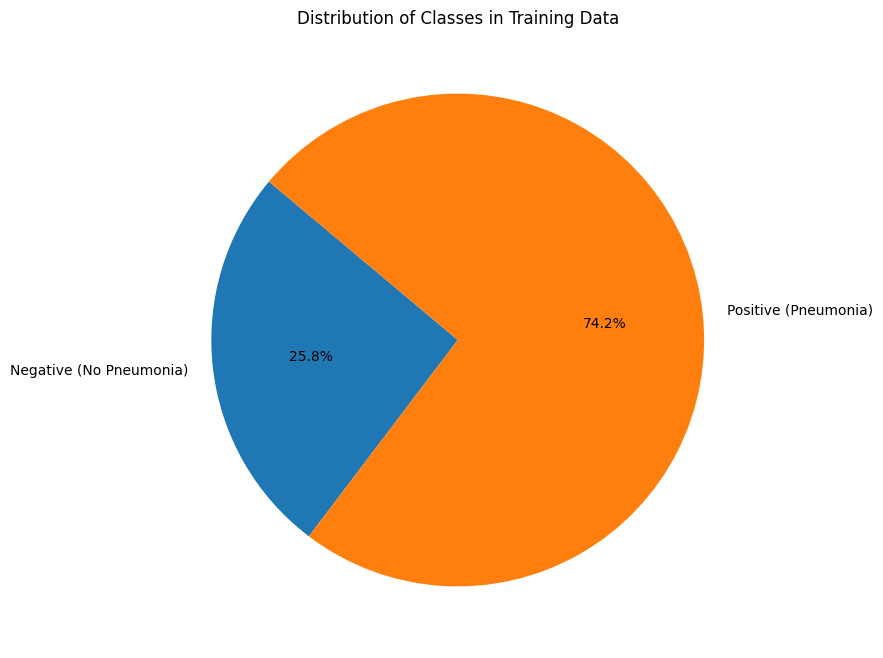

In [15]:
# Assuming train_labels is one-hot encoded
class_counts = np.sum(train_labels, axis=0)
class_labels = ['Negative (No Pneumonia)', 'Positive (Pneumonia)']

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in Training Data')
plt.show()